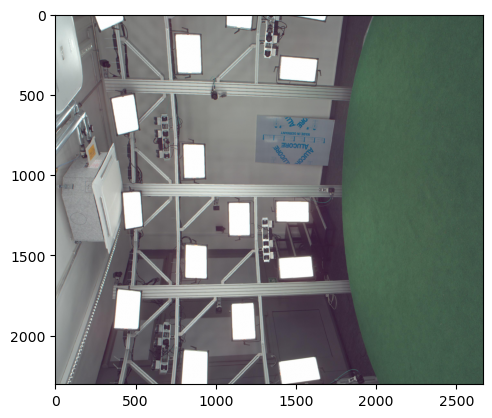

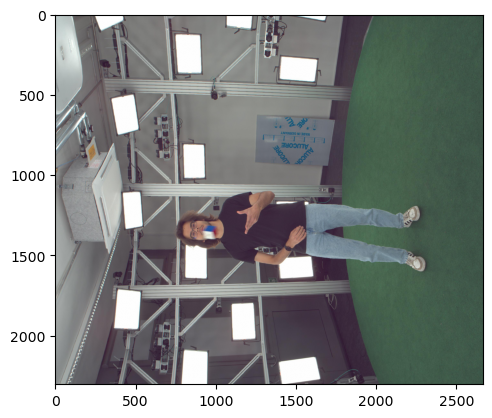

In [45]:
import numpy as np
from matplotlib import pyplot as plt
import skimage as ski
import os

bg = "/data/student_kaempchen/ed3dgs-data/vci/2024_12_12_dynamic3/background/rgb"
frame = "/data/student_kaempchen/ed3dgs-data/vci/2024_12_12_dynamic3/frame_00000/rgb"

img_name = "C0004.jpg"

bg_np = ski.io.imread(os.path.join(bg, img_name)) / 255.0
frame_np = ski.io.imread(os.path.join(frame, img_name)) / 255.0

plt.imshow(bg_np)
plt.show()

plt.imshow(frame_np)
plt.show()

(2304, 2664, 3)
float64


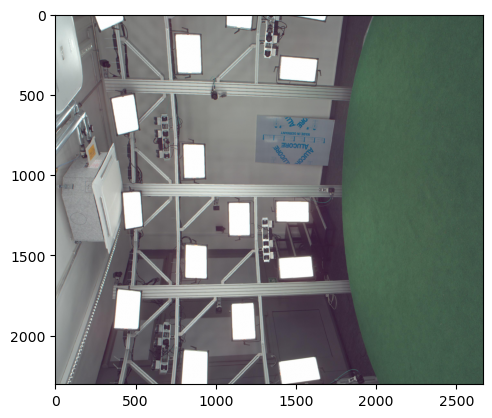

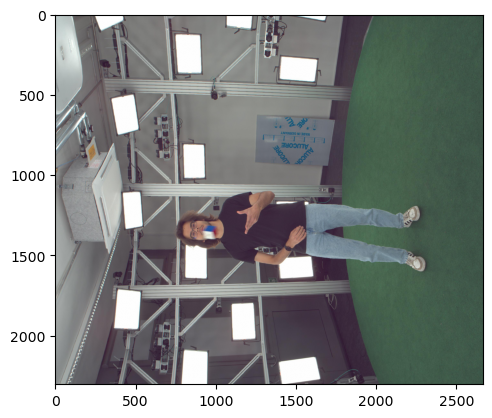

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os

bg = "/data/student_kaempchen/ed3dgs-data/vci/2024_12_12_dynamic3/background/rgb"
frame = "/data/student_kaempchen/ed3dgs-data/vci/2024_12_12_dynamic3/frame_00000/rgb"

img_name = "C0004.jpg"

bg_img = Image.open(os.path.join(bg, img_name))
frame_img = Image.open(os.path.join(frame, img_name))

bg_np = np.asarray(bg_img) / 255.0
frame_np = np.asarray(frame_img) / 255.0

print(frame_np.shape)

plt.imshow(bg_np)
plt.show()

plt.imshow(frame_np)
plt.show()

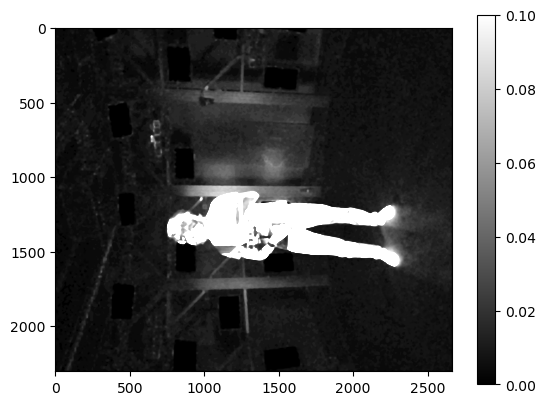

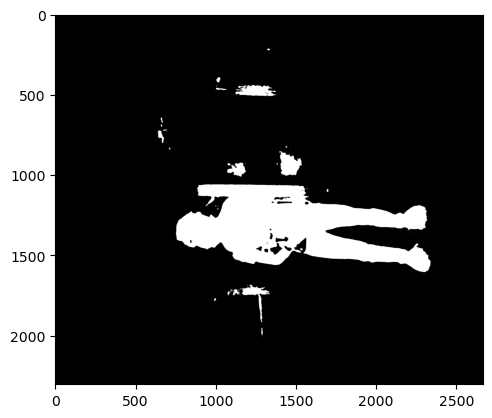

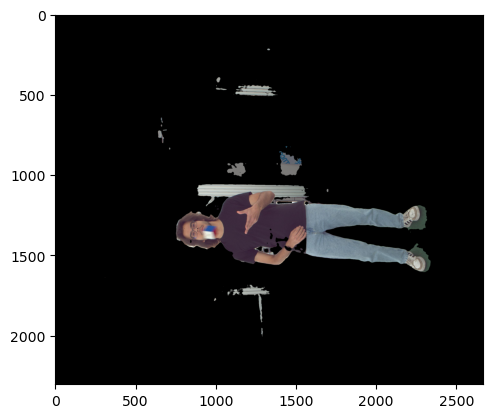

In [43]:
from skimage import filters
from scipy import ndimage as ndi
from scipy import signal

diff = np.abs(bg_np - frame_np)
diff = np.mean(diff, axis=2)
#diff = filters.gaussian(diff, sigma=2)
#diff = filters.median(diff, footprint=np.ones((15,15)))
diff = signal.medfilt2d(diff, kernel_size=15)
#diff = ndi.minimum_filter(diff, size=(13,13))
mask = np.where(diff < 0.04, 0.0, 1.0)
#thres = filters.threshold_otsu(diff)

plt.imshow(diff, vmin=0.0, vmax=0.1, cmap="gray")
plt.colorbar()
plt.show()

#mask = diff > thres

plt.imshow(mask, cmap="gray")
plt.show()

res = frame_np * mask[..., None]

plt.imshow(res)
plt.show()

#fig, ax = filters.try_all_threshold(diff, figsize=(10, 8))
#plt.show()

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy import signal, ndimage
import skimage as ski
from skimage import filters, transform
import os

In [3]:
bg_path = "/data/student_kaempchen/ed3dgs-data/vci/2024_12_12_dynamic3/background/rgb/*.jpg"
frame_path = "/data/student_kaempchen/ed3dgs-data/vci/2024_12_12_dynamic3/images/cam00/*.jpg"

bgs = ski.io.imread_collection(bg_path, conserve_memory=False)
bgs_arr = bgs.concatenate() / 255.0

frames = ski.io.imread_collection(frame_path, conserve_memory=False)
frames_arr = frames.concatenate() / 255.0

In [64]:
# Rescale images
factor = 0.5
bgs_rescaled = np.array([transform.rescale(bgs_arr[i], factor, channel_axis=-1) for i in range(bgs_arr.shape[0])])
frames_rescaled = np.array([transform.rescale(frames_arr[i], factor, channel_axis=-1) for i in range(frames_arr.shape[0])])

print(bgs_rescaled.shape)
print(frames_rescaled.shape)

(27, 1152, 1332, 3)
(27, 1152, 1332, 3)


In [9]:
def calc_masks(frames, bgs):
	diff = np.abs(frames - bgs)
	diff = np.mean(diff, axis=-1)

	#thres = ndimage.maximum_filter(diff, size=(3,3), axes=(1,2))
	diff = ndimage.gaussian_filter(diff, sigma=5, axes=(-1, -2))

	return np.where(diff < 0.05, 0.0, 1.0)

In [12]:
bg_img = bgs_arr[0]
frames_masked = np.array([frames_arr[i] * calc_masks(frames_arr[i], bg_img)[..., None] for i in range(frames_arr.shape[0])])
print(frames_masked.shape)

(325, 2304, 2664, 3)


In [14]:
bg_img = bgs_arr[0]
frame = frames[0] / 255.0
masked = frame * calc_masks(frame, bg_img)[..., None]
ski.io.imsave("test.jpg", np.uint8(masked * 255.0), check_contrast=False)

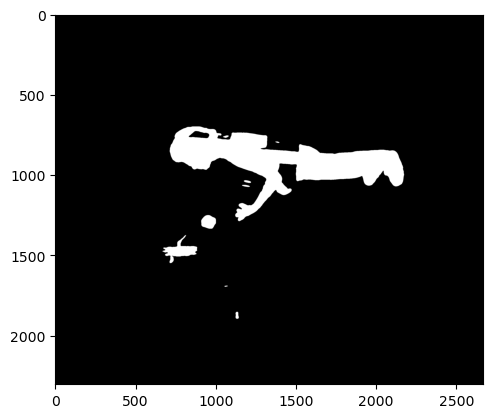

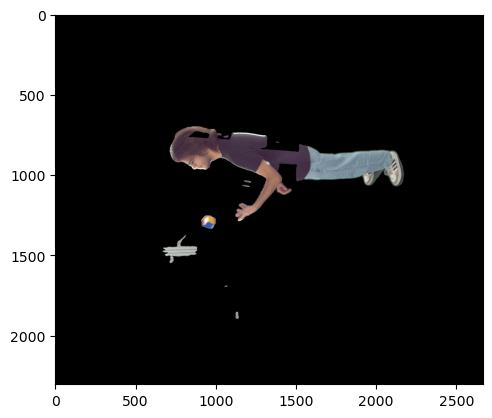

In [10]:
bg_img = bgs_arr[0]

#masks = calc_masks(frames_arr, bg_img[None, ...])

#print(masks.shape)
#frames_masked = frames_arr * masks[..., None]

i = 0

#plt.imshow(masks[i], cmap="gray")
#plt.show()
plt.imshow(frames_masked[i])
plt.show()

In [11]:
ski.io.imsave("test.jpg", np.uint8(frames_masked[0] * 255))

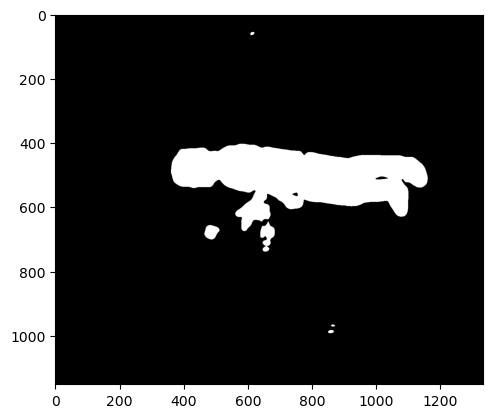

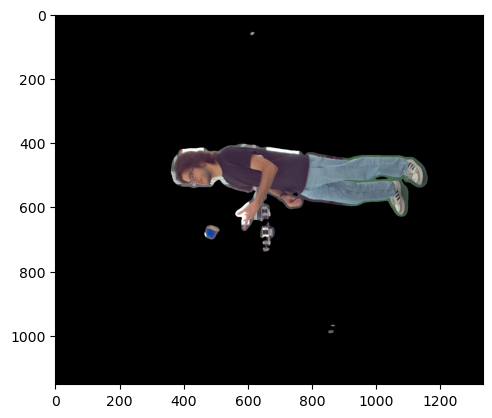

In [137]:
frames_masked = frames_rescaled * masks[..., None]

i = 5

plt.imshow(masks[i], cmap="gray")
plt.show()
plt.imshow(frames_masked[i])
plt.show()